# Performing stacks and mosaics with Easy-EO
The stacking example in this notebook uses Sentinel 2 images form the Copernicus Dataspace Browser, stored in the `s2` folder.
It has all bands excluding the 8A band

Apart from terminal functions like the visualization functions, all outputs can be saved to disk using `.save_raster("output.tiff")`

In [1]:
import os
from glob import glob

from eeo import load_raster
from eeo.ops import mosaic, stack

## Reading files

In [3]:
raster_files_dir = r"./data/s2"
first_raster_path = r"./data/raster_a.tif"
second_raster_path = r"./data/raster_b.tif"

datasets = [load_raster(file) for file in sorted(glob(os.path.join(raster_files_dir, "*.tiff")))]
ds_1 = load_raster(first_raster_path)
ds_2 = load_raster(second_raster_path)

## Performing Stacks

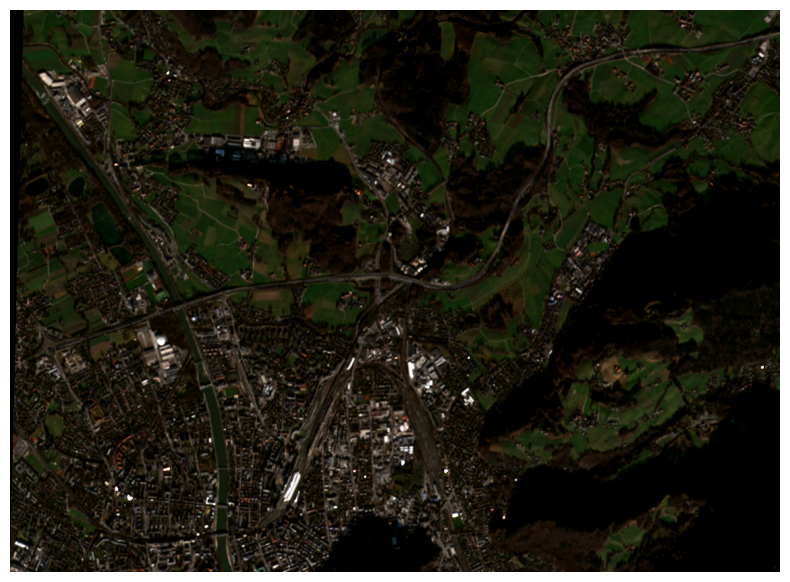

In [ ]:
stacked = stack(datasets[0], datasets[1:]) # the first dataset, the second to the last

# Plot the composite, here a normalization is applied to improve the visualization before plotting
# the True Color composite (4-3-2 bands). Any other 3-band composite can be plotted as well
stacked.normalize_percentile(lower_percentile=2, upper_percentile=98).plot_composite(bands=(4, 3, 2))

## Performing mosaics

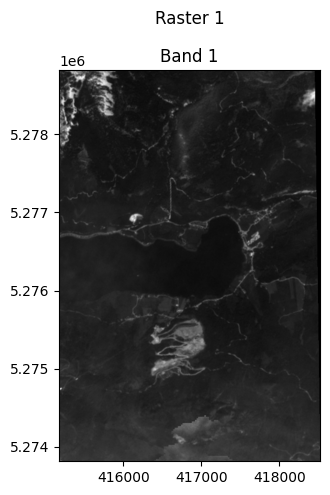

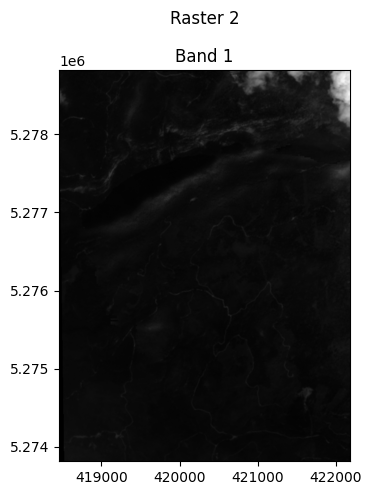

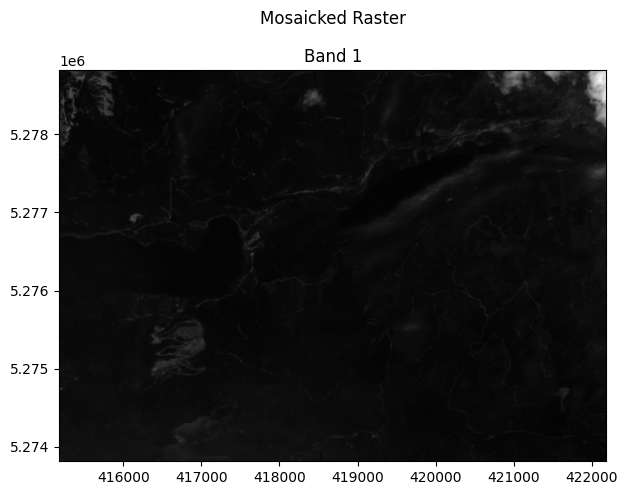

In [11]:
mosaicked_ds = mosaic(ds_1, ds_2, resampling_method="bilinear")

ds_1.plot_raster(title="Raster 1")
ds_2.plot_raster(title="Raster 2")
mosaicked_ds.plot_raster(title="Mosaicked Raster")

## Close datasets

In [12]:
ds_1.close()
ds_2.close()
stacked.close()
mosaicked_ds.close()